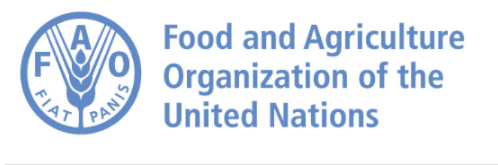

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Scénario
Vous avez récemment rejoint une équipe de chercheurs de la Food and Agriculture Organization of the United Nations (FAO), en tant que data analyst.
Son rôle ? C’est l’un des organes qui composent l’ONU et dont l’objectif est « d’aider à construire un monde libéré de la faim ». 

Le responsable de l’équipe, Marc, un chercheur en économie de la santé, est particulièrement enthousiaste à l’idée de votre arrivée au sein de son équipe. En effet, ce recrutement tombe à pic car Julien, l'ancien data analyst, a récemment été muté dans une autre équipe, et la vôtre vient de se voir confier la mission de réaliser une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.

# Missions

Permettre à la  FAO d'avoir un panorama de l’état de la malnutrition dans le monde, à partir des données suivantes

# PARTIE 1
- visualisation des données 

# PARTIE 2
- La proportion de personnes en état de sous-nutrition

- Le nombre théorique de personnes qui pourraient être nourries à partir de la disponilité alimentaire

- La disponibilité alimentaire
   * La disponibilité alimentaire des produits d'origine végétale
   * La disponibilité alimentaire des produits d'origine animale
   * Visualisation de la proportion des personnes pouvant etre nourries en fonction des produits d'origine animale et végétale

- La disponibilité intérieure

# PARTIE 3
-  les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
-  les pays qui ont le plus bénéficié d’aide depuis 2013
-  les pays ayant le plus/le moins de disponibilité/habitant



## Partie 1 - Visualisation des données
Chargement des 4 fichiers csv avec la fonction read_csv de Pandas

In [2]:
sous_nutrition= pd.read_csv("sous_nutrition.csv")
population= pd.read_csv("population.csv")
dispo_alimentaire= pd.read_csv("dispo_alimentaire.csv")
aide_alimentaire= pd.read_csv("aide_alimentaire.csv")

Visualisation des fichiers

In [3]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [4]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [5]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [6]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


## PARTIE 2
### 1- la proportion de personnes en état de sous-nutrition 
pour réaliser cette étude, nous prendrons les fichiers :
* sous nutrition
* population

In [7]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


Notre étude porte sur l'année 2017, selon le fichier lexique, il s'agit de "2016-2018"

In [8]:
sous_nutrition['Année']=sous_nutrition['Année'][sous_nutrition['Année'] == "2016-2018"]

Calculer le taux moyen de valeurs manquantes pour chacune des variables

In [9]:
sous_nutrition.isna().mean()

Zone      0.000000
Année     0.833333
Valeur    0.487685
dtype: float64

fonction dropna pour nettoyer les valeurs manquantes 

In [10]:
sous_nutrition.dropna(axis=0, inplace=True)

transformation du type la feature "Année" pour avoir integer (au lieu d'object) 

In [11]:
sous_nutrition_2017= sous_nutrition.replace("2016-2018","2017")

In [12]:
sous_nutrition_2017['Année']=pd.to_numeric(sous_nutrition_2017['Année'])

transformation du type la feature "Valeur" pour pouvoir utiliser les fonctions d'aggregation

In [13]:
sous_nutrition_2017.dtypes

Zone      object
Année      int64
Valeur    object
dtype: object

In [14]:
sous_nutrition_2017.loc[sous_nutrition_2017['Valeur']=='<0.1','Valeur'] = np.nan
sous_nutrition_2017['Valeur']=pd.to_numeric(sous_nutrition_2017['Valeur'])

In [15]:
sous_nutrition_2017.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [16]:
sous_nutrition_2017_somme= sous_nutrition_2017['Valeur'].sum()

In [17]:
print(f'Le nombre de personnes en état de sous-nutrition en 2017 est de : {round(sous_nutrition_2017_somme)} Millions')

Le nombre de personnes en état de sous-nutrition en 2017 est de : 536 Millions


Interessons nous maintenant au fichier population pour pouvoir connaitre la proportion du nombre de personnes en état de sous-nutrition par rapport à la population globale

In [18]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [19]:
population.dtypes

Zone       object
Année       int64
Valeur    float64
dtype: object

In [20]:
population.shape

(1416, 3)

In [21]:
population['Année'].value_counts()

2013    236
2014    236
2015    236
2016    236
2017    236
2018    236
Name: Année, dtype: int64

In [22]:
population['Année'].value_counts()

2013    236
2014    236
2015    236
2016    236
2017    236
2018    236
Name: Année, dtype: int64

selection sur la feature ''Année' du fichier population des valeurs '2017' avec la fonction loc de Pandas

In [23]:
population_2017=population.loc[lambda population: population['Année'] == 2017]

In [24]:
population_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


fonction dropna pour eliminer les valeurs des autres années

In [25]:
population_2017.shape

(236, 3)

In [26]:
population.isna().mean()

Zone      0.0
Année     0.0
Valeur    0.0
dtype: float64

In [27]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [28]:
population_2017['Année'].sum()

476012

In [29]:
population_2017.head()

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409


In [30]:
population_2017_somme=population_2017['Valeur'].sum()/1000

In [31]:
print(f'Le nombre de personnes en 2017 est de : {round(population_2017_somme,2)} Millions')

Le nombre de personnes en 2017 est de : 7548.13 Millions


In [32]:
sous_nutrition_pourcentage = sous_nutrition_2017_somme/(population_2017_somme)

In [33]:
print(f'Le pourcentage de personnes en etat de sous nutrition en 2017 est de : {round(sous_nutrition_pourcentage*100,2)} %')

Le pourcentage de personnes en etat de sous nutrition en 2017 est de : 7.1 %


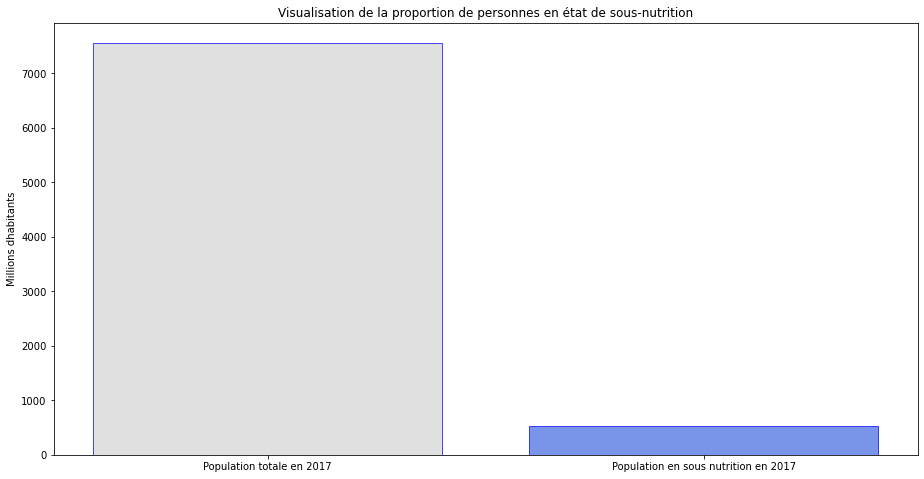

In [34]:
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = ['Population totale en 2017', 'Population en sous nutrition en 2017']
data = [population_2017_somme,sous_nutrition_2017_somme]
ax.bar(labels,data,color=['lightgray','royalblue'],alpha=0.7,edgecolor='blue')
ax.set_title('Visualisation de la proportion de personnes en état de sous-nutrition')
ax.set_ylabel('Millions d''habitants')
plt.show()

### 2- Le nombre théorique de personnes qui pourraient être nourries à partir de la disponilité alimentaire

Visualisation du fichier csv disponibilités alimentaires

In [35]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [36]:
dispo_alimentaire.shape

(15605, 18)

utilisation de pivot_table de Pandas

In [37]:
dispo_alimentaire_2017=dispo_alimentaire.pivot_table(index="Zone", values="Disponibilité alimentaire (Kcal/personne/jour)",aggfunc='sum', margins=True)

In [38]:
dispo_alimentaire_2017

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,2087.0
Afrique du Sud,3020.0
Albanie,3188.0
Algérie,3293.0
Allemagne,3503.0
...,...
Équateur,2346.0
États-Unis d'Amérique,3682.0
Éthiopie,2129.0


In [39]:
population_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [40]:
nb_theorique= pd.merge(population_2017, dispo_alimentaire_2017,on="Zone")

In [41]:
nb_theorique

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,2087.0
1,Afrique du Sud,2017,57009.756,3020.0
2,Albanie,2017,2884.169,3188.0
3,Algérie,2017,41389.189,3293.0
4,Allemagne,2017,82658.409,3503.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2633.0
168,Viet Nam,2017,94600.648,2744.0
169,Yémen,2017,27834.819,2217.0
170,Zambie,2017,16853.599,1924.0


In [42]:
nb_theorique["disponibilité * population"]=nb_theorique["Valeur"]*nb_theorique["Disponibilité alimentaire (Kcal/personne/jour)"]

In [43]:
nb_theorique

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),disponibilité * population
0,Afghanistan,2017,36296.113,2087.0,7.574999e+07
1,Afrique du Sud,2017,57009.756,3020.0,1.721695e+08
2,Albanie,2017,2884.169,3188.0,9.194731e+06
3,Algérie,2017,41389.189,3293.0,1.362946e+08
4,Allemagne,2017,82658.409,3503.0,2.895524e+08
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2633.0,7.741674e+07
168,Viet Nam,2017,94600.648,2744.0,2.595842e+08
169,Yémen,2017,27834.819,2217.0,6.170979e+07
170,Zambie,2017,16853.599,1924.0,3.242632e+07


In [44]:
nb_theorique = nb_theorique["disponibilité * population"].sum()

In [45]:
nb_theorique 

20918984627.330997

Le besoin énergétique moyen d'une personne se situe à **2500kcal** /pers/jour

In [46]:
nb_theorique= nb_theorique /2500

In [47]:
nb_theorique= nb_theorique/1000

In [48]:
print(f'Le nombre théorique de personnes pouvant être nourries est de : {round(nb_theorique,2)} Millions')

Le nombre théorique de personnes pouvant être nourries est de : 8367.59 Millions


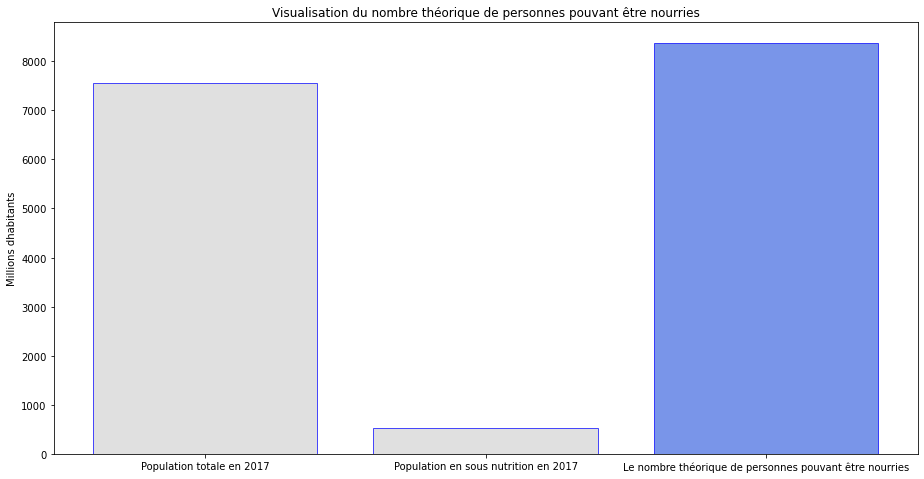

In [49]:
#visualisation avec barplot de matplotlib
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = ['Population totale en 2017', 'Population en sous nutrition en 2017','Le nombre théorique de personnes pouvant être nourries']
data = [population_2017_somme,sous_nutrition_2017_somme,nb_theorique]
ax.bar(labels,data,color=['lightgrey','lightgrey','royalblue'],alpha=0.7,edgecolor='blue')
ax.set_title('Visualisation du nombre théorique de personnes pouvant être nourries')
ax.set_ylabel('Millions d''habitants')
plt.show()

### 3- 1) la disponibilité alimentaire des produits d'origine végétale


In [50]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [51]:
dispo_produits_vegetaux = dispo_alimentaire[dispo_alimentaire["Origine"] == "vegetale"]

selection des valeurs d'origine vegetales

In [52]:
dispo_produits_vegetaux.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN


In [53]:
dispo_produits_vegetaux_theorique=dispo_produits_vegetaux.pivot_table(values="Disponibilité alimentaire (Kcal/personne/jour)", index="Zone",aggfunc='sum')

In [54]:
dispo_produits_vegetaux_theorique

,Disponibilité alimentaire (Kcal/personne/jour)
Zone,
Afghanistan,1871.0
Afrique du Sud,2533.0
Albanie,2203.0
Algérie,2915.0
Allemagne,2461.0
...,...
Émirats arabes unis,2718.0
Équateur,1732.0
États-Unis d'Amérique,2698.0


fonction merge pour fusionner les deux tables en fonction d'une feature identique aux deux tables: **Zone**

In [55]:
nb_theorique_dispo_vegetaux= pd.merge(population_2017, dispo_produits_vegetaux_theorique,on="Zone")

In [56]:
nb_theorique_dispo_vegetaux

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour)
0,Afghanistan,2017,36296.113,1871.0
1,Afrique du Sud,2017,57009.756,2533.0
2,Albanie,2017,2884.169,2203.0
3,Algérie,2017,41389.189,2915.0
4,Allemagne,2017,82658.409,2461.0
...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2157.0
168,Viet Nam,2017,94600.648,2169.0
169,Yémen,2017,27834.819,2028.0
170,Zambie,2017,16853.599,1818.0


In [57]:
nb_theorique_dispo_vegetaux["disponibilité * population"]=nb_theorique_dispo_vegetaux["Valeur"]*nb_theorique_dispo_vegetaux["Disponibilité alimentaire (Kcal/personne/jour)"]

In [58]:
nb_theorique_dispo_vegetaux

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),disponibilité * population
0,Afghanistan,2017,36296.113,1871.0,6.791003e+07
1,Afrique du Sud,2017,57009.756,2533.0,1.444057e+08
2,Albanie,2017,2884.169,2203.0,6.353824e+06
3,Algérie,2017,41389.189,2915.0,1.206495e+08
4,Allemagne,2017,82658.409,2461.0,2.034223e+08
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,2157.0,6.342116e+07
168,Viet Nam,2017,94600.648,2169.0,2.051888e+08
169,Yémen,2017,27834.819,2028.0,5.644901e+07
170,Zambie,2017,16853.599,1818.0,3.063984e+07


In [59]:
nb_theorique_dispo_vegetaux = nb_theorique_dispo_vegetaux["disponibilité * population"].sum()

In [60]:
nb_theorique_dispo_vegetaux

17260764211.501

In [61]:
nb_theorique_dispo_vegetaux= nb_theorique_dispo_vegetaux/2500

In [62]:
nb_theorique_dispo_vegetaux= nb_theorique_dispo_vegetaux/1000

In [63]:
print(f'Le nombre théorique de personnes pouvant être nourries avec des produits vegetaux est de : {round(nb_theorique_dispo_vegetaux,2)} Millions')

Le nombre théorique de personnes pouvant être nourries avec des produits vegetaux est de : 6904.31 Millions


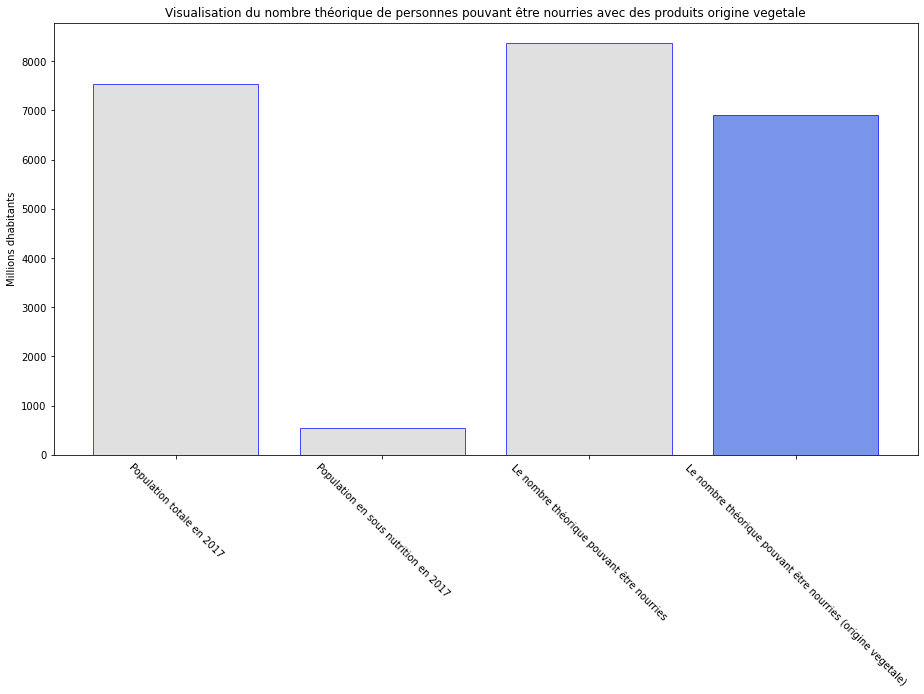

In [64]:
#visualisation avec barplot de matplotlib
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = ['Population totale en 2017', 'Population en sous nutrition en 2017','Le nombre théorique pouvant être nourries','Le nombre théorique pouvant être nourries (origine vegetale)']
data = [population_2017_somme,sous_nutrition_2017_somme,nb_theorique,nb_theorique_dispo_vegetaux]
ax.bar(labels,data,color=['lightgrey','lightgrey','lightgrey','royalblue'],alpha=0.7,edgecolor='blue')
ax.set_title('Visualisation du nombre théorique de personnes pouvant être nourries avec des produits origine vegetale')
ax.tick_params(axis='x', labelrotation=-45)
ax.set_ylabel('Millions d''habitants')
plt.show()

### 3- 2)la disponibilité alimentaire des produits d'origine animale

In [65]:
dispo_produits_origine_animale =  dispo_alimentaire[dispo_alimentaire["Origine"] == "animale"]
dispo_produits_origine_animale_theorique=dispo_produits_origine_animale.pivot_table(index="Zone",values="Disponibilité alimentaire (Kcal/personne/jour)", 
                                                                                  aggfunc='sum')
nb_dispo_produits_origine_animale_theorique= pd.merge(population_2017, dispo_produits_origine_animale_theorique,on="Zone")

In [66]:
nb_dispo_produits_origine_animale_theorique["disponibilité * population"]=nb_dispo_produits_origine_animale_theorique["Valeur"]*nb_dispo_produits_origine_animale_theorique["Disponibilité alimentaire (Kcal/personne/jour)"]

In [67]:
nb_dispo_produits_origine_animale_theorique

,Zone,Année,Valeur,Disponibilité alimentaire (Kcal/personne/jour),disponibilité * population
0,Afghanistan,2017,36296.113,216.0,7.839960e+06
1,Afrique du Sud,2017,57009.756,487.0,2.776375e+07
2,Albanie,2017,2884.169,985.0,2.840906e+06
3,Algérie,2017,41389.189,378.0,1.564511e+07
4,Allemagne,2017,82658.409,1042.0,8.613006e+07
...,...,...,...,...,...
167,Venezuela (République bolivarienne du),2017,29402.484,476.0,1.399558e+07
168,Viet Nam,2017,94600.648,575.0,5.439537e+07
169,Yémen,2017,27834.819,189.0,5.260781e+06
170,Zambie,2017,16853.599,106.0,1.786481e+06


In [68]:
nb_dispo_produits_origine_animale_theorique=nb_dispo_produits_origine_animale_theorique["disponibilité * population"].sum()

In [69]:
nb_dispo_produits_origine_animale_theorique= nb_dispo_produits_origine_animale_theorique /2500

In [70]:
nb_dispo_produits_origine_animale_theorique= nb_dispo_produits_origine_animale_theorique/1000

In [71]:
print(f'Le nombre théorique de personnes pouvant être nourries avec des produits d origine animale est de : {round(nb_dispo_produits_origine_animale_theorique,2)} Millions')

Le nombre théorique de personnes pouvant être nourries avec des produits d origine animale est de : 1463.29 Millions


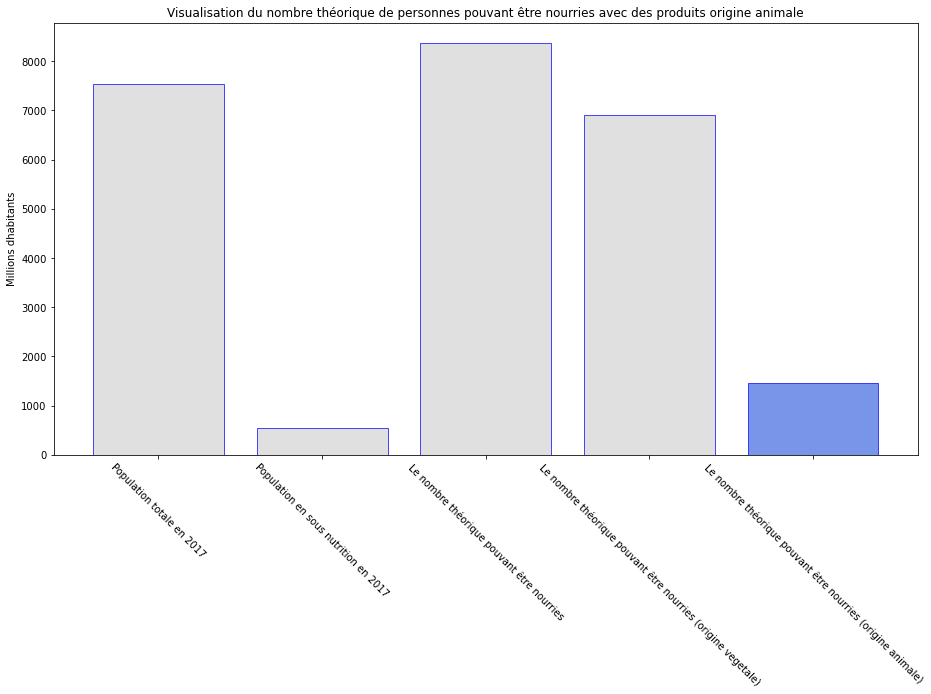

In [72]:
#visualisation avec barplot de matplotlib
fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
labels = ['Population totale en 2017', 'Population en sous nutrition en 2017','Le nombre théorique pouvant être nourries','Le nombre théorique pouvant être nourries (origine vegetale)','Le nombre théorique pouvant être nourries (origine animale)']
data = [population_2017_somme,sous_nutrition_2017_somme,nb_theorique,nb_theorique_dispo_vegetaux,nb_dispo_produits_origine_animale_theorique]
ax.bar(labels,data,color=['lightgrey','lightgrey','lightgrey','lightgrey','royalblue'],alpha=0.7,edgecolor='blue')
ax.set_title('Visualisation du nombre théorique de personnes pouvant être nourries avec des produits origine animale')
ax.tick_params(axis='x', labelrotation=-45)
ax.set_ylabel('Millions d''habitants')
plt.show()

### 3- 3) Visualisation de la proportion des personnes pouvant etre nourries en fonction des produits d'origine animale et végétale

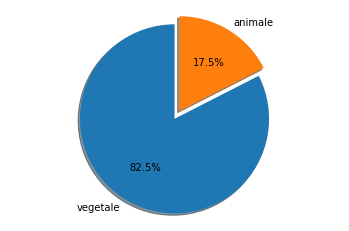

In [73]:
labels = 'vegetale', 'animale'
sizes=[nb_theorique_dispo_vegetaux,nb_dispo_produits_origine_animale_theorique]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### 4- La disponibilité intérieure
*  La part qui est attribuée à l’alimentation animale
*  La  part qui est attribuée à l’alimentation perdue
*  La  part qui est attribuée pour l'alimentation humaine. 

In [74]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [75]:
dispo_alimentaire.columns

Index(['Zone', 'Produit', 'Origine', 'Aliments pour animaux',
       'Autres Utilisations', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité intérieure', 'Exportations - Quantité',
       'Importations - Quantité', 'Nourriture', 'Pertes', 'Production',
       'Semences', 'Traitement', 'Variation de stock'],
      dtype='object')

In [76]:
dispo_alimentaire.dtypes

Zone                                                              object
Produit                                                           object
Origine                                                           object
Aliments pour animaux                                            float64
Autres Utilisations                                              float64
Disponibilité alimentaire (Kcal/personne/jour)                   float64
Disponibilité alimentaire en quantité (kg/personne/an)           float64
Disponibilité de matière grasse en quantité (g/personne/jour)    float64
Disponibilité de protéines en quantité (g/personne/jour)         float64
Disponibilité intérieure                                         float64
Exportations - Quantité                                          float64
Importations - Quantité                                          float64
Nourriture                                                       float64
Pertes                                             

selection des variables qui précisent les utilisations/moyens d’acquisition de la disponibilité alimentaire.

In [77]:
disponibilite_interieure= dispo_alimentaire[['Zone','Disponibilité intérieure','Aliments pour animaux', 
                                     'Exportations - Quantité','Importations - Quantité', 
                                     'Nourriture', 'Pertes', 'Production','Semences', 
                                     'Traitement', 'Variation de stock']]

In [78]:
disponibilite_interieure

,Zone,Disponibilité intérieure,Aliments pour animaux,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,53.0,NaN,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,41.0,NaN,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,2.0,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,82.0,NaN,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,3.0,NaN,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,2.0,NaN,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [79]:
proportion_disponibilite_interieure=disponibilite_interieure.pivot_table(index="Zone",values=('Disponibilité intérieure','Aliments pour animaux', 
                                     'Exportations - Quantité','Importations - Quantité', 
                                     'Nourriture', 'Pertes', 'Production','Semences', 
                                     'Traitement', 'Variation de stock'), aggfunc='sum')

In [80]:
proportion_disponibilite_interieure

,Aliments pour animaux,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,
Afghanistan,768.0,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


In [81]:
def proportion_interieure (col) :
    return col.sum()/proportion_disponibilite_interieure['Disponibilité intérieure'].sum()

In [82]:
proportions_dispo_intérieure = proportion_disponibilite_interieure.apply(proportion_interieure)

In [83]:
proportions_dispo_intérieure 

Aliments pour animaux       0.132424
Disponibilité intérieure    1.000000
Exportations - Quantité     0.137289
Importations - Quantité     0.131592
Nourriture                  0.495102
Pertes                      0.046065
Production                  1.016315
Semences                    0.015705
Traitement                  0.223849
Variation de stock         -0.010600
dtype: float64

<ipython-input-84-e1ca95b1828c>:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',


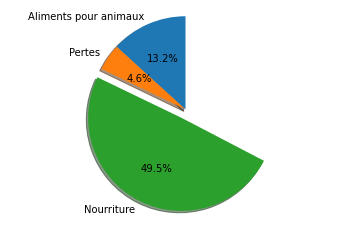

In [84]:
labels = 'Aliments pour animaux', 'Pertes','Nourriture'
sizes=[proportions_dispo_intérieure['Aliments pour animaux'], proportions_dispo_intérieure['Pertes'], proportions_dispo_intérieure['Nourriture']]
explode = (0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## PARTIE 3

-  Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017
-  Les pays qui ont le plus bénéficié d’aide depuis 2013
-  Les pays ayant le plus/le moins de disponibilité/habitant

### Les pays pour lesquels la proportion de personnes sous-alimentées est la plus forte en 2017

In [85]:
population_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36296.113
10,Afrique du Sud,2017,57009.756
16,Albanie,2017,2884.169
22,Algérie,2017,41389.189
28,Allemagne,2017,82658.409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29402.484
1396,Viet Nam,2017,94600.648
1402,Yémen,2017,27834.819
1408,Zambie,2017,16853.599


In [86]:
population_2017['Valeur']=population_2017.apply(lambda x : x['Valeur']/1000,axis=1)

<ipython-input-86-a347a86f7dac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  population_2017['Valeur']=population_2017.apply(lambda x : x['Valeur']/1000,axis=1)


In [87]:
population_2017

,Zone,Année,Valeur
4,Afghanistan,2017,36.296113
10,Afrique du Sud,2017,57.009756
16,Albanie,2017,2.884169
22,Algérie,2017,41.389189
28,Allemagne,2017,82.658409
...,...,...,...
1390,Venezuela (République bolivarienne du),2017,29.402484
1396,Viet Nam,2017,94.600648
1402,Yémen,2017,27.834819
1408,Zambie,2017,16.853599


In [88]:
population_sous_nutrition_2017= pd.merge(population_2017, sous_nutrition_2017,on="Zone")

In [89]:
population_sous_nutrition_2017.drop(['Année_x','Année_y'], axis=1, inplace=True)

In [90]:
population_sous_nutrition_2017=population_sous_nutrition_2017.rename(columns = {'Valeur_x': 'Population_globale', 'Valeur_y': 'Population_sous_nutrition'})

In [91]:
population_sous_nutrition_2017.dropna(axis=0, inplace=True)

In [92]:
population_sous_nutrition_2017

,Zone,Population_globale,Population_sous_nutrition
0,Afghanistan,36.296113,10.5
1,Afrique du Sud,57.009756,3.1
2,Albanie,2.884169,0.1
3,Algérie,41.389189,1.3
4,Angola,29.816766,5.8
...,...,...,...
97,Togo,7.698474,1.6
99,Turkménistan,5.757667,0.2
100,Ukraine,44.487709,1.5
102,Venezuela (République bolivarienne du),29.402484,8.0


In [122]:
population_sous_nutrition_2017['Proportion']=population_sous_nutrition_2017.apply(lambda x : x['Population_sous_nutrition']/(population_sous_nutrition_2017['Population_globale']),axis=1)

In [123]:
population_sous_nutrition_2017

,Zone,Population_globale,Population_sous_nutrition,Proportion
44,Inde,1338.676785,190.1,0.142006
75,Pakistan,207.906209,24.8,0.018526
45,Indonésie,264.650963,23.6,0.017629
71,Nigéria,190.873244,22.8,0.017032
8,Bangladesh,159.685424,21.5,0.016061
...,...,...,...,...
32,Eswatini,1.124805,0.2,0.000149
99,Turkménistan,5.757667,0.2,0.000149
25,Costa Rica,4.949954,0.2,0.000149
14,Bulgarie,7.102444,0.2,0.000149


In [124]:
population_sous_nutrition_2017['Proportion']=population_sous_nutrition_2017.apply(lambda x : x['Proportion']*100,axis=1)

In [125]:
population_sous_nutrition_2017.sort_values(by='Proportion',ascending=False, inplace=True)

In [128]:
population_sous_nutrition_2017=population_sous_nutrition_2017.iloc[:10]

In [130]:
proportion_population_sous_nutrition_2017=population_sous_nutrition_2017['Proportion']

ValueError: x must be 1D

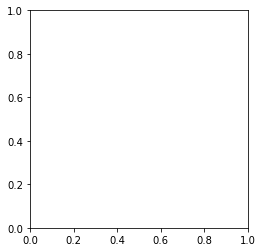

In [132]:
labels = population_sous_nutrition_2017['Zone']
sizes=[proportion_population_sous_nutrition_2017]
explode = (0)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()